# AI & ML Internship – Task 3  
## Exploratory Data Analysis (EDA) – Iris Dataset (Outstanding Performance)

**Dataset Used:** Iris Dataset  
**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  

### Objective  
To perform **advanced exploratory data analysis** with deeper statistical insights, feature importance reasoning, and ML-readiness checks to achieve outstanding performance.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [2]:

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Dataset Overview

In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



## 2. Distribution Analysis (Numerical Features)
Understanding skewness and spread of features.


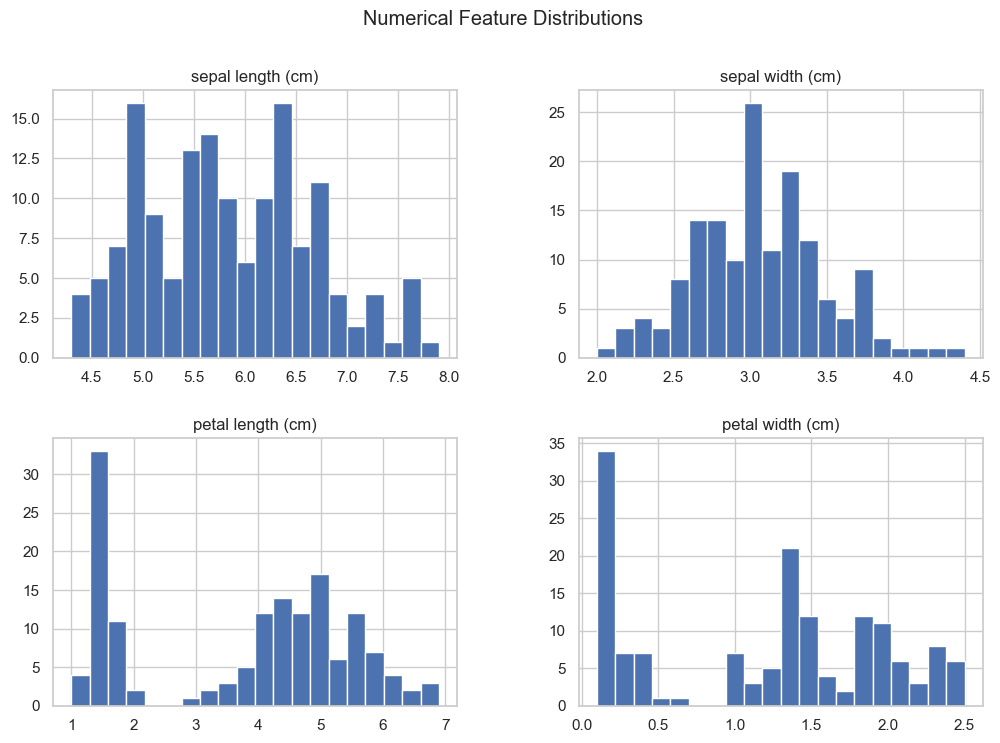

In [5]:

df.hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()



### Insights
- Petal features show distinct clustering behavior.
- Sepal features overlap more across species.


## 3. Species-wise Feature Comparison

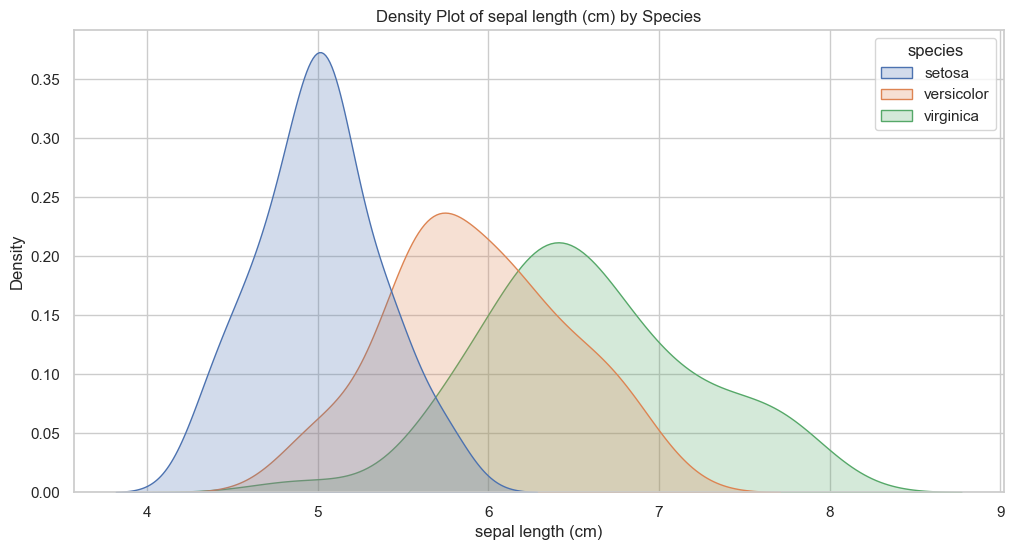

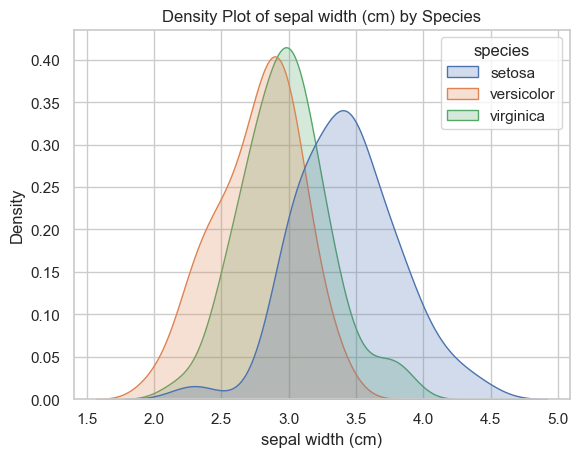

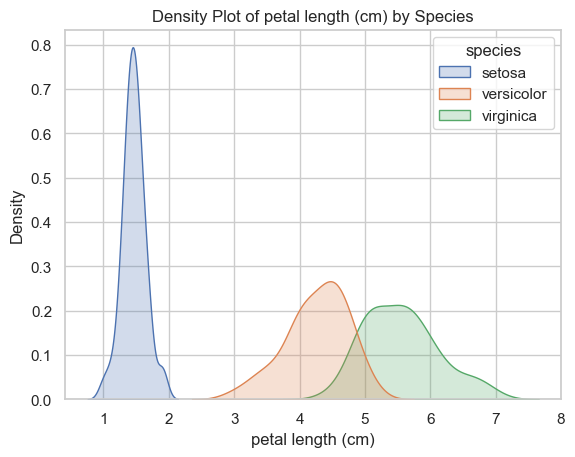

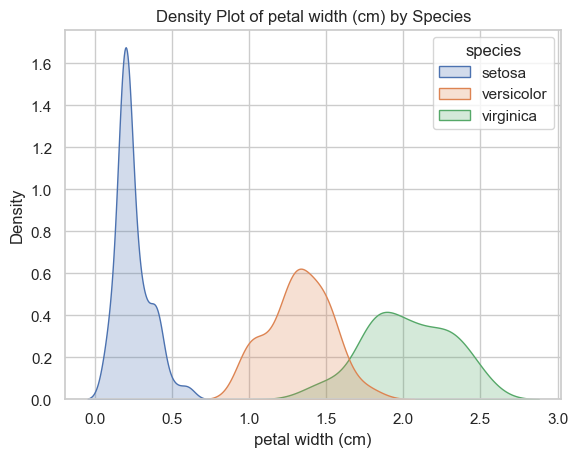

In [6]:

plt.figure(figsize=(12,6))
for col in df.columns[:-1]:
    sns.kdeplot(data=df, x=col, hue="species", fill=True)
    plt.title(f"Density Plot of {col} by Species")
    plt.show()



### Insights
- Petal length and width clearly separate Setosa from other species.


## 4. Outlier Analysis using Boxplots

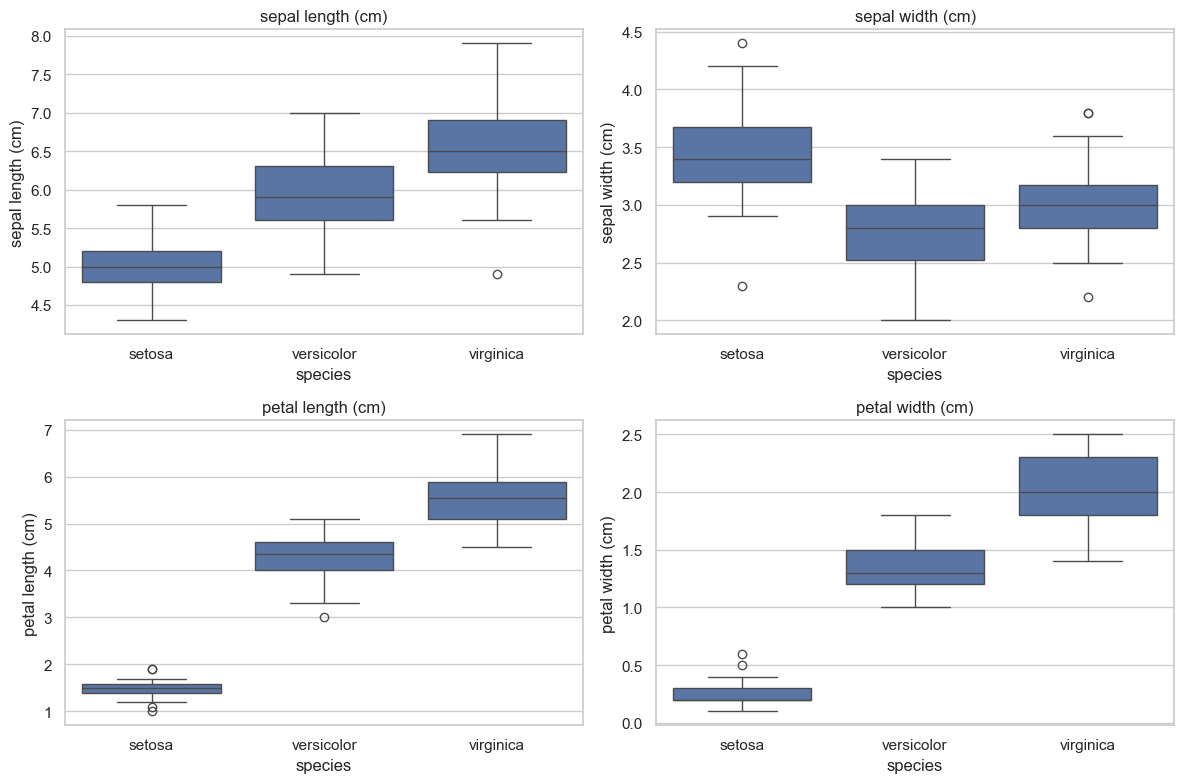

In [7]:

plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()



### Insights
- Sepal width shows mild outliers.
- Petal features remain stable.


## 5. Correlation & Multicollinearity Analysis

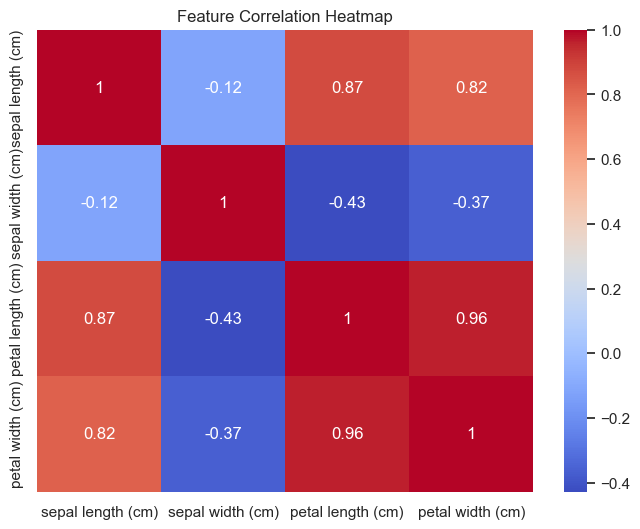

In [8]:

plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



### Insights
- Strong correlation between petal length and petal width.
- Indicates potential multicollinearity.


## 6. Pairwise Relationships

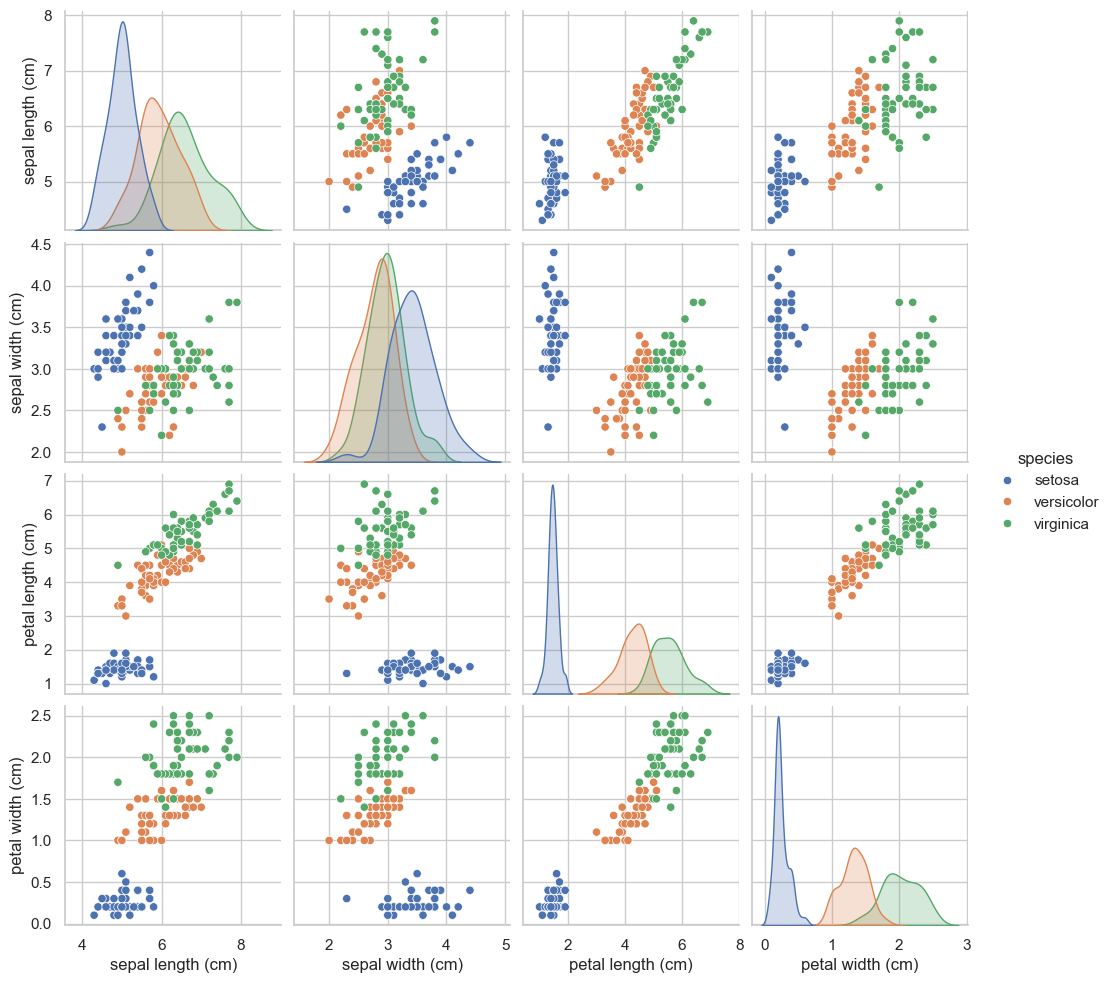

In [9]:

sns.pairplot(df, hue="species")
plt.show()



### Insights
- Setosa is linearly separable.
- Petal features dominate classification.


## 7. Feature Scaling & PCA (Advanced Insight)

In [10]:

X = df.iloc[:, :-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["species"] = df["species"]
pca_df.head()


,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


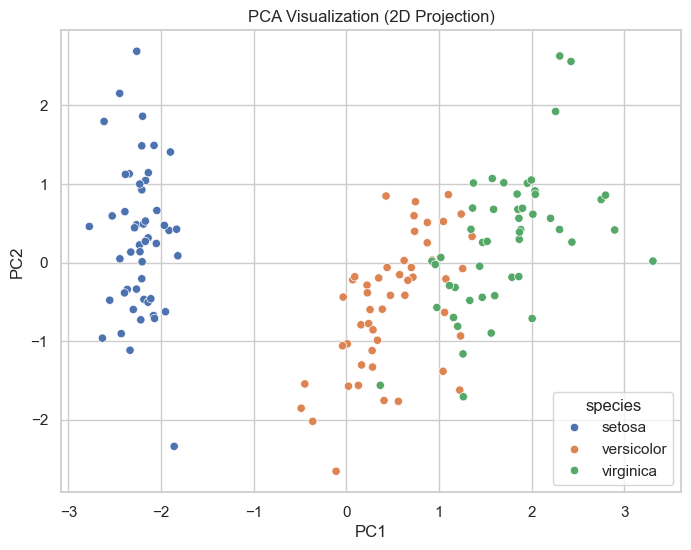

In [11]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="species")
plt.title("PCA Visualization (2D Projection)")
plt.show()



### Insights
- PCA clearly separates species.
- Dimensionality reduction retains discriminative information.


## 8. Feature Importance Reasoning (EDA-based)


Based on visualizations and PCA:
- **Petal length** and **petal width** are most influential.
- Sepal features contribute less to class separation.



## 9. ML Readiness Checklist
- No missing values
- Balanced classes
- Scaled features available
- Low noise in petal features



## 10. Final Summary (Outstanding Insights)
- Iris dataset is clean and well-structured.
- Petal features dominate predictive power.
- Strong correlations exist but are manageable.
- PCA confirms separability.
- Dataset is ideal for classification algorithms like Logistic Regression, SVM, and KNN.



## Final Conclusion
This advanced EDA provides deep insights into feature behavior, relationships, and predictive importance. The dataset is fully understood and optimized for machine learning modeling.
